# PN2V Prediction
Please run the `2_ProbabilisticNoise2VoidTraining.ipynb` notebook first.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
from tifffile import imread
import sys
sys.path.append('../../../')
from unet.model import UNet
from pn2v.utils import denormalize
from pn2v.utils import normalize
from pn2v.utils import PSNR
from pn2v import utils
from pn2v import prediction
import pn2v.training
from pn2v import histNoiseModel
from pn2v import gaussianMixtureNoiseModel

# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Load Data

In [2]:
# We need the training data in order to calulate 'mean' and 'std' for normalization
path='../../../data/Mouse skull nuclei/'

# Load the test data
dataTest=imread(path+"example2_digital_offset300.tif")[:,:,:256] 
# We are loading only a sub image to spped up computation

# We estimate the ground truth by averaging.
dataTestGT=np.mean(dataTest[:,...],axis=0)[np.newaxis,...]



### Load the Network and Noise Model

In [3]:
typeNoiseModel='GMM' # Choose 'GMM' or 'histogram' to specify the appropriate noise model
dataName = 'mouseskullnuclei'# Use the same name as used in 2_ProbabilisticNoise2VoidTraining.ipynb. This is a part of model name created in ProbabilisticNoise2VoidTraining.ipynb
mode = 'bootstrap' #  #Either 'bootstrap'(bootstrapping mode) or 'calibration'(using calibration data)
if (typeNoiseModel =='GMM'):
    n_gaussian = 3 # If using GMM noise model, specify number of Gaussians created in CreateNoiseModel_GMM.ipynb
    n_coeff = 2 # If using GMM noise model, specify number of coefficients created in CreateNoiseModel_GMM.ipynb

In [4]:
if(typeNoiseModel=='GMM'): 
    namePN2VModel=dataName+'_GMM_'+str(n_gaussian)+'gaussian_'+str(n_coeff)+'coefficients_'+mode
    params= np.load(path+'trained_weights_minSignal_maxSignal_GMM_'+dataName+'_'+str(n_gaussian)+'gaussian_'+str(n_coeff)+'coefficients_'+mode+'.npz')
    noiseModel = gaussianMixtureNoiseModel.GaussianMixtureNoiseModel(params['min_signal'][0], params['max_signal'][0],
                                                                     torch.Tensor(params['trained_weight']))
else:
    namePN2VModel=dataName+'_histogram_'+mode
    histogram = np.load(path+'noiseModelHistogram_'+ dataName+'_'+mode+'.npy') 
    noiseModel= histNoiseModel.NoiseModel(histogram, device=device)

/home/lalit/Desktop/01_Softwares/anaconda3/envs/ppn2vEnv/lib/python3.7/site-packages/torch/cuda/__init__.py:118: UserWarning: 
    Found GPU1 NVS 310 which is of cuda capability 2.1.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability that we support is 3.5.
    
  warnings.warn(old_gpu_warn % (d, name, major, capability[1]))


In [5]:
net=torch.load(path+"/last_"+namePN2VModel+".net")

### Evaluation

image: 0
PSNR input 28.02423798473431
PSNR prior 35.7196313630751
PSNR mse 36.20189864411701
-----------------------------------
image: 1
PSNR input 28.065531602490644
PSNR prior 35.836445150413596
PSNR mse 36.33513318727266
-----------------------------------
image: 2
PSNR input 28.035021421910734
PSNR prior 35.825166141681215
PSNR mse 36.32872590748795
-----------------------------------
image: 3
PSNR input 28.087744381628678
PSNR prior 35.87166817988614
PSNR mse 36.39369185557057
-----------------------------------
image: 4
PSNR input 28.061745249613562
PSNR prior 35.74002361402642
PSNR mse 36.22970479270328
-----------------------------------
image: 5
PSNR input 28.1086316653067
PSNR prior 35.88136983276804
PSNR mse 36.406462269850586
-----------------------------------
image: 6
PSNR input 28.11584919615069
PSNR prior 35.93468205213012
PSNR mse 36.449259737881256
-----------------------------------
image: 7
PSNR input 28.078571033189487
PSNR prior 35.8680626768168
PSNR mse 36.36620

image: 63
PSNR input 28.12501501087707
PSNR prior 35.974241480896964
PSNR mse 36.50793311480821
-----------------------------------
image: 64
PSNR input 28.07112598033649
PSNR prior 35.91125408883123
PSNR mse 36.43482674401939
-----------------------------------
image: 65
PSNR input 28.096510397485332
PSNR prior 35.89483193457208
PSNR mse 36.39563564876133
-----------------------------------
image: 66
PSNR input 28.129393849352013
PSNR prior 35.91617703726189
PSNR mse 36.42110722043639
-----------------------------------
image: 67
PSNR input 28.11863774042713
PSNR prior 35.905490996531185
PSNR mse 36.426782136499504
-----------------------------------
image: 68
PSNR input 28.0744924081312
PSNR prior 35.8745369347566
PSNR mse 36.369604394766505
-----------------------------------
image: 69
PSNR input 28.087115550087496
PSNR prior 35.91390315331624
PSNR mse 36.43184651248156
-----------------------------------
image: 70
PSNR input 28.100664171847036
PSNR prior 35.93402495752773
PSNR mse 

image: 125
PSNR input 28.072423743733374
PSNR prior 35.87004241553936
PSNR mse 36.36827090285807
-----------------------------------
image: 126
PSNR input 28.10362116835521
PSNR prior 35.89027951921323
PSNR mse 36.40625094469347
-----------------------------------
image: 127
PSNR input 28.0866054971337
PSNR prior 35.87556225429401
PSNR mse 36.35014382640156
-----------------------------------
image: 128
PSNR input 28.074943517260927
PSNR prior 35.97898378025269
PSNR mse 36.46903723383927
-----------------------------------
image: 129
PSNR input 28.11689860560632
PSNR prior 35.912427238800774
PSNR mse 36.4162730202853
-----------------------------------
image: 130
PSNR input 28.080942114379344
PSNR prior 35.86201367324217
PSNR mse 36.36875735965629
-----------------------------------
image: 131
PSNR input 28.079838325466856
PSNR prior 35.896559277585055
PSNR mse 36.39974773617142
-----------------------------------
image: 132
PSNR input 28.115379662314908
PSNR prior 35.91658174567265
PS

image: 187
PSNR input 28.12713881880164
PSNR prior 35.88549079320752
PSNR mse 36.39906879722648
-----------------------------------
image: 188
PSNR input 28.13034668273638
PSNR prior 35.902770605404626
PSNR mse 36.40252953283448
-----------------------------------
image: 189
PSNR input 28.10561031416221
PSNR prior 35.91256317855596
PSNR mse 36.422215184206365
-----------------------------------
image: 190
PSNR input 28.111479741803066
PSNR prior 35.8479925615748
PSNR mse 36.34296341392143
-----------------------------------
image: 191
PSNR input 28.07092498764707
PSNR prior 35.880365939078104
PSNR mse 36.38268451002653
-----------------------------------
image: 192
PSNR input 28.166413092352876
PSNR prior 35.94434369293541
PSNR mse 36.476187281598655
-----------------------------------
image: 193
PSNR input 28.087727009670633
PSNR prior 35.80202271359548
PSNR mse 36.30708508621542
-----------------------------------
image: 194
PSNR input 28.11679210976056
PSNR prior 35.88099992699795
P

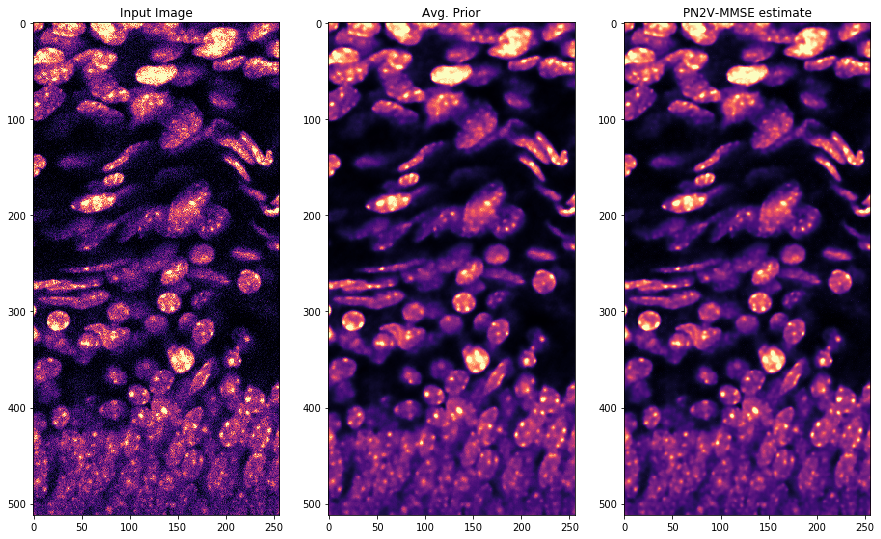

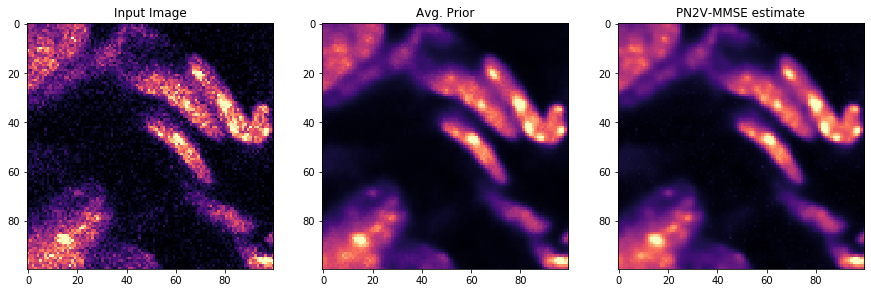

Avg PSNR Prior: 35.915699006403536 +-(2SEM) 0.008482114681139548
Avg PSNR MMSE: 36.42903811483046 +-(2SEM) 0.009821884348100163


In [6]:
# Now we are processing data and calculating PSNR values.
results=[]
meanRes=[]
resultImgs=[]
inputImgs=[]

# We iterate over all test images.
for index in range(dataTest.shape[0]):
    
    im=dataTest[index]
    gt=dataTestGT[0] # The ground truth is the same for all images
    
    # We are using tiling to fit the image into memory
    # If you get an error try a smaller patch size (ps)
    means, mseEst = prediction.tiledPredict(im, net, ps=128, overlap=48,
                                             device=device, noiseModel=noiseModel)

    
    resultImgs.append(mseEst)
    inputImgs.append(im)

    rangePSNR=np.max(gt)-np.min(gt)
    psnr=PSNR(gt, mseEst,rangePSNR )
    psnrPrior=PSNR(gt, means,rangePSNR )
    results.append(psnr)
    meanRes.append(psnrPrior)

    print ("image:",index)
    print ("PSNR input",PSNR(gt, im, rangePSNR))
    print ("PSNR prior",psnrPrior) # Without info from masked pixel
    print ("PSNR mse",psnr) # MMSE estimate using the masked pixel
    print ('-----------------------------------')

    
    
    
# We display the results for the last test image       
vmi=np.percentile(gt,0.01)
vma=np.percentile(gt,99)

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means, vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 3)
plt.title(label='PN2V-MMSE estimate')
plt.imshow(mseEst, vmax=vma, vmin=vmi, cmap='magma')
plt.show()

plt.figure(figsize=(15, 15))
plt.subplot(1, 3, 1)
plt.title(label='Input Image')
plt.imshow(im[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 2)
plt.title(label='Avg. Prior')
plt.imshow(means[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')

plt.subplot(1, 3, 3)
plt.title(label='PN2V-MMSE estimate')
plt.imshow(mseEst[100:200,150:250], vmax=vma, vmin=vmi, cmap='magma')
plt.show()

print("Avg PSNR Prior:", np.mean(np.array(meanRes) ), '+-(2SEM)',2*np.std(np.array(meanRes) )/np.sqrt(float(len(meanRes)) ) )
print("Avg PSNR MMSE:", np.mean(np.array(results) ),  '+-(2SEM)' ,2*np.std(np.array(results) )/np.sqrt(float(len(results)) ) )